##4.1 A LiDAR example
Here we are going to generate a LiDAR waveform using the <code><span style="background-color:lightgrey">sphere.obj</span></code> from the very first example.  The image below shows the return energy as a function of time

<img src=img/lidar.gif width=400>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from run_start import *
from hips2img import *

##The <code><span style="background-color:lightgrey">lidar_camera.dat</span></code> file

The contents of the <code><span style="background-color:lightgrey">lidar_camera.dat</span></code> looks like this:

<code>
    camera {
      camera.name  = "lidar camera";

      geometry.perspective = TRUE; 
      geometry.idealArea = 100000
      geometry.azimuth = 0.0;
      geometry.zenith = 0.0;
      geometry.twist = 0.0;
      geometry.lookAt = 0, 0, 0;
      geometry.boomLength = 10000.;

      samplingCharacteristics.nPixels = 262144;
      samplingCharacteristics.rpp = 1;

      result.integral.mode = "distance"
      result.samplingImage = "output/image_lidar.hips"
      result.integral = "output/results_lidar.dat"

      lidar.nBins = 150
      lidar.binStart = 14000
      lidar.binStep = 1000

    }
</code>

There are a couple of differences here between this and the <code><span style="background-color:lightgrey">camera.dat</span></code> used in previous examples.  These include:

<code>result.integral.mode</code> now records 'distance' instead of 'reflectance' or 'waveband'

<code>

start:

	VERBOSE flag on (-v option)

read_spectral_file:	1 data entries read in file wb/brdf_waveband.dat

camera lidar camera: at 0.000000 0.000000 10000.000000 focalLength: 0.100000

camera simple illumination: orthographic at  0.000000 0.000000 10000.000000 looking at  0.000000 0.000000 0.000000 angles: zenith 0.000000 azimuth 0.000000 twist 0.000000

(100.00)


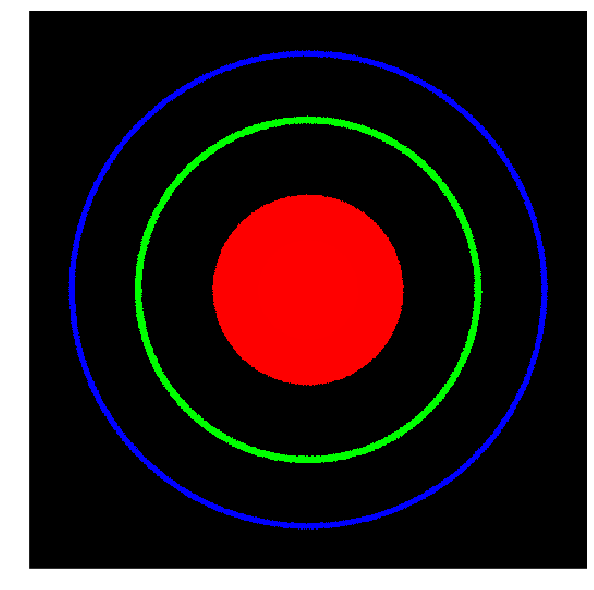

In [27]:
# we have specified the brdf_wavband.dat as this has only one band
cmd = 'echo 14 camera/lidar_camera.dat /Users/phil/Downloads/lidar/light1.dat | \
       start -v -RATm 1 -RATsensor_wavebands wb/brdf_waveband.dat obj/sphere.obj'
# cmd = 'echo 14 camera/lidar_camera.dat light/lidar_light.dat | \
#        start -v -RATm 1 -RATsensor_wavebands wb/brdf_waveband.dat obj/sphere.obj'
error = run_start(cmd)

if not error:
    # we can look at a slice of the resulting image using the 'order'
    # option, in this case we are looking at slices 0, 10, 30
    hips2img('output/image_lidar.hips', stretch=True, order=[0, 10, 30])

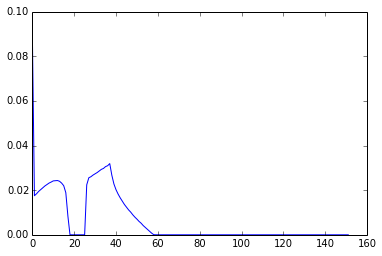

In [28]:
# We can then look at the results of this by plotting
# reflectance against distance
refl = np.loadtxt('output/results_lidar.dat.direct')
plt.plot(refl[:, 1:].mean(axis=1))

start:

	VERBOSE flag on (-v option)

read_spectral_file:	1 data entries read in file wb/brdf_waveband.dat

camera lidar camera: at 0.000000 0.000000 10000.000000 focalLength: 0.100000

camera simple illumination: at 0.000000 0.000000 10000.000000 focalLength: 0.100000

(100.00)


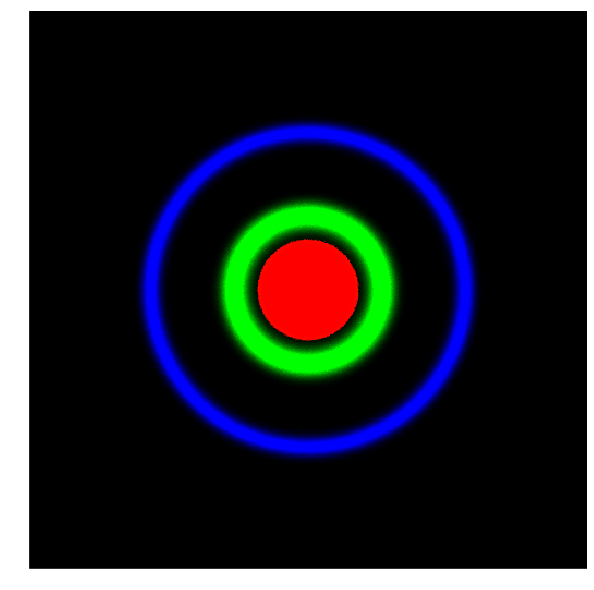

In [31]:
# we have specified the brdf_wavband.dat as this has only one band
cmd = 'echo 14 camera/lidar_camera.dat light/lidar_pulse.dat | \
       start -v -RATm 1 -RATsensor_wavebands wb/brdf_waveband.dat obj/sphere.obj'
error = run_start(cmd)

if not error:
    # we can look at a slice of the resulting image using the 'order'
    # option, in this case we are looking at slices 0, 10, 30
    hips2img('output/image_lidar.hips', stretch=True, order=[0, 10, 30])

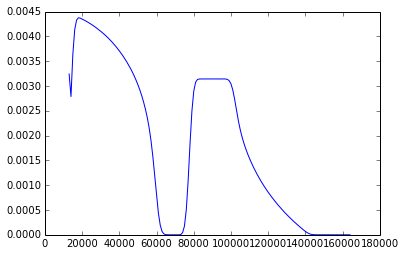

In [32]:
# We can then look at the results of this by plotting
# reflectance against distance
refl = np.loadtxt('output/results_lidar.dat.direct')
plt.plot(refl[:, 0], refl[:, 1:].mean(axis=1))